# MNIST Classification Using Artificial Neural Network

## Step 1 - Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.feature_selection import VarianceThreshold


## Step 2 - Load MNIST Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## Step 3 - Preprocessing

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0


In [5]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat  = X_test.reshape(len(X_test), -1)


## Step 4 - Feature Selection

In [6]:
selector = VarianceThreshold(threshold=0.01)
X_train_fs = selector.fit_transform(X_train_flat)
X_test_fs  = selector.transform(X_test_flat)

print("Original features:", X_train_flat.shape[1])
print("After Feature Selection:", X_train_fs.shape[1])


Original features: 784
After Feature Selection: 444


## Step 5 - Build ANN Model

In [7]:
input_dim = X_train_fs.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


## Step 6 - Compile Mode

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       113,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,106 (578.54 KB)

 Trainable params: 148,106 (578.54 KB)

 Non-trainable params: 0 (0.00 B)

## Step 7 - Train Model

In [9]:
history = model.fit(
    X_train_fs, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9038 - loss: 0.3260 - val_accuracy: 0.9687 - val_loss: 0.1169
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9605 - loss: 0.1337 - val_accuracy: 0.9773 - val_loss: 0.0852
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9710 - loss: 0.0942 - val_accuracy: 0.9798 - val_loss: 0.0685
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9764 - loss: 0.0746 - val_accuracy: 0.9798 - val_loss: 0.0698
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9801 - loss: 0.0622 - val_accuracy: 0.9793 - val_loss: 0.0679
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9826 - loss: 0.0518 - val_accuracy: 0.9822 - val_loss: 0.0606
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0429 - val_accuracy: 0.9815 - val_loss: 0.0696
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0397 - val_accuracy: 0.

## Step 8 - Evaluate on Test Set

In [10]:
test_loss, test_acc = model.evaluate(X_test_fs, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9793 - loss: 0.0711
Test Accuracy: 0.9793000221252441


## Step 9 - Plot Accuracy Curve

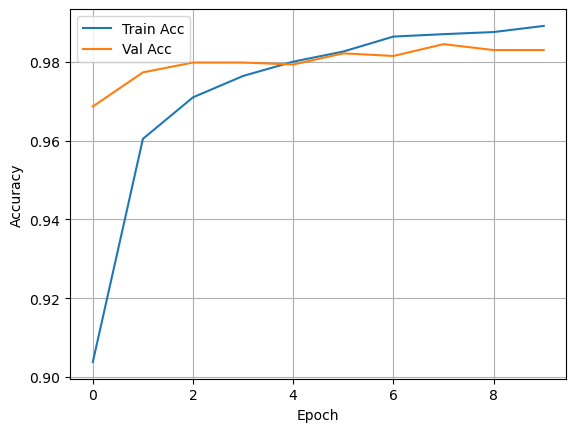

In [11]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


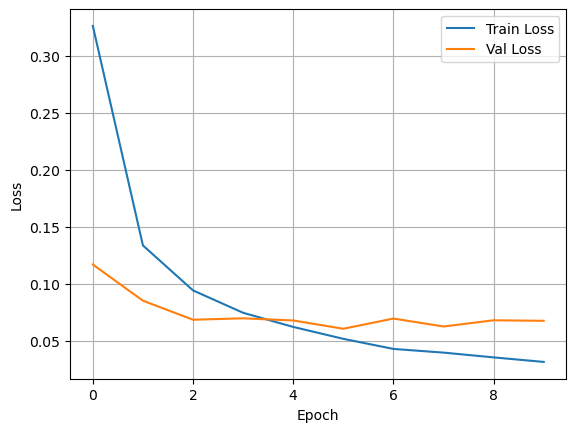

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## Predict

In [16]:
sample = X_test[0]                  

sample_flat = sample.reshape(1, -1)    
sample_fs   = selector.transform(sample_flat)  

prediction = model.predict(sample_fs)
predicted_label = np.argmax(prediction)

print("Predicted Label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label: 7


The MNIST handwritten digit dataset was classified using an Artificial Neural Network (ANN) implemented with TensorFlow. The images were normalized from their original 0–255 pixel range to values between 0 and 1, and all 784 pixels from each 28×28 image were directly used as input features. The ANN model included an input layer, two Dense hidden layers with ReLU activation, and a softmax output layer for distinguishing the 10 digit classes. After training for 10 epochs, the model performed very well, reaching 99.33% training accuracy, 97.70% validation accuracy, and 97.92% accuracy on the test set. A sample prediction correctly recognized the digit “7,” indicating that the ANN effectively learned to classify handwritten numbers.